C:\Users\karti\AppData\Local\Temp\ipykernel_29936\4093680380.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("Fremont_Bridge_Hourly_Bicycle_Counts.csv",


Index(['Date', 'Fremont Bridge Sidewalks, south of N 34th St Total',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')
RMSE: 3480.31


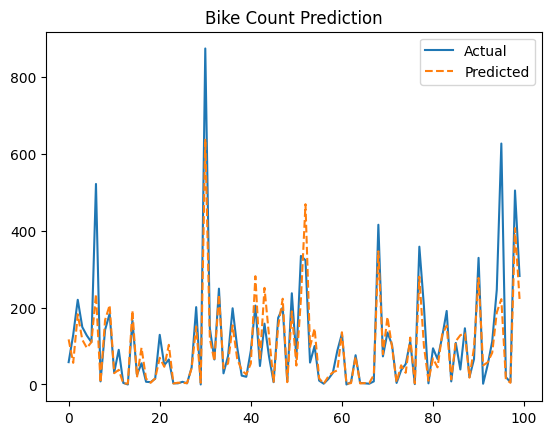

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data (after downloading the CSV manually or using an API)
df = pd.read_csv("Fremont_Bridge_Hourly_Bicycle_Counts.csv", 
                 parse_dates=["Date"], 
                 date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))
df.head()
print(df.columns)

df["total_bikes"] = df['Fremont Bridge Sidewalks, south of N 34th St Total'].fillna(0)


# Time features
df["hour"] = df["Date"].dt.hour
df["dayofweek"] = df["Date"].dt.dayofweek
df["month"] = df["Date"].dt.month
df["is_weekend"] = df["dayofweek"] >= 5

# Model training
X = df[["hour", "dayofweek", "month", "is_weekend"]]
y = df["total_bikes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("RMSE:", round(mean_squared_error(y_test, y_pred), 2))

# Plot
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted", linestyle="--")
plt.legend()
plt.title("Bike Count Prediction")
plt.show()



In [11]:

if "Fremont Bridge NB" in df.columns and "Fremont Bridge SB" in df.columns:
    df["total_bikes"] = df["Fremont Bridge NB"].fillna(0) + df["Fremont Bridge SB"].fillna(0)
elif "Fremont Bridge East Sidewalk" in df.columns and "Fremont Bridge West Sidewalk" in df.columns:
    df["total_bikes"] = df["Fremont Bridge East Sidewalk"].fillna(0) + df["Fremont Bridge West Sidewalk"].fillna(0)
elif "Total" in df.columns:
    df["total_bikes"] = df["Total"].fillna(0)
else:
    raise ValueError("Can't find bike count columns in dataset.")

# Time features
df["hour"] = df["Date"].dt.hour
df["dayofweek"] = df["Date"].dt.dayofweek
df["month"] = df["Date"].dt.month
df["is_weekend"] = df["dayofweek"] >= 5

# Model training
X = df[["hour", "dayofweek", "month", "is_weekend"]]
y = df["total_bikes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("RMSE:", round(mean_squared_error(y_test, y_pred, squared=False), 2))

# Plot
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted", linestyle="--")
plt.legend()
plt.title("Bike Count Prediction")
plt.show()

ValueError: Can't find bike count columns in dataset.